In [8]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict, Literal, Annotated
from operator import add
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage
from langgraph.graph.message import add_messages
load_dotenv()

True

In [15]:
class ChatStop(BaseModel):
    decision: Literal["stop", "keep_going"]

In [16]:
class BotState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]
    decision: Literal["stop", "keep_going"]

In [17]:
llm = ChatGoogleGenerativeAI(model= "gemini-2.5-flash-lite")
def chatbot(state: BotState):
    res = llm.invoke(state["messages"])
    return {"messages": [res]}

def check(state: BotState) -> Literal["stop", "keep_going"]:
    decision = state["messages"][-1].content
    if decision == "stop":
        return "stop"
    return "keep_going"

In [18]:
llm.invoke("hey tehre")

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash-lite
Please retry in 43.960479692s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash-lite"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_v

KeyboardInterrupt: 

In [ ]:
# GRAPH
graph = StateGraph(BotState)

graph.add_node("bot", chatbot)

graph.add_edge(START, "bot")
graph.add_conditional_edges("bot", check, {"stop": END, "keep_going": "bot"})

workflow = graph.compile()

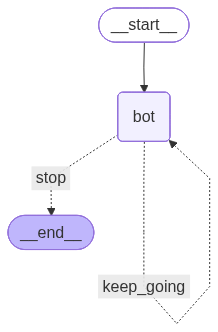

In [13]:
workflow

In [14]:
final_state = workflow.invoke({
    "messages": [HumanMessage(content="hii, my name is")],
    "decision": "keep_going"
})

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 5, model: gemini-2.5-flash
Please retry in 27.990575973s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 5


KeyboardInterrupt: 

In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict, Literal, Annotated
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph.message import add_messages

load_dotenv()

class BotState(TypedDict):
    # 'add_messages' handles appending new messages to the existing list automatically
    messages: Annotated[list[BaseMessage], add_messages] 

# 1. Update Model Name (Assuming 1.5-flash, adjust if you have specific access)
llm = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")

def chatbot(state: BotState):
    # 2. FIX: Pass the list of messages directly, not a dict
    res = llm.invoke(state["messages"])
    return {"messages": [res]}

def check(state: BotState) -> Literal["stop", "keep_going"]:
    # Warning: The LLM is unlikely to output exactly "stop" unless instructed.
    # This logic might loop until it hits the recursion limit.
    last_message = state["messages"][-1].content
    if "bye" in last_message.lower() or "stop" in last_message.lower():
        return "stop"
    return "keep_going"

# GRAPH
graph = StateGraph(BotState)

graph.add_node("bot", chatbot)

graph.add_edge(START, "bot")

# 3. FIX: Only use conditional edges here. 
# You previously had graph.add_edge("bot", END) as well, which conflicts.
graph.add_conditional_edges(
    "bot", 
    check, 
    {"stop": END, "keep_going": "bot"}
)

workflow = graph.compile()

# Invoke
final_state = workflow.invoke({
    "messages": [HumanMessage(content="hii, my name is")],
})

# Print result to verify
print(final_state["messages"][-1].content)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 3.625173764s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 20
}
